# 1 - ESTUDO DE CASO

Este projeto de tem como objetivo estudar as bibliotecas de ML utilizadas no dia a dia da ciências de dados e colocar em prática para avaliação de crédito.

- **Aplicação Prática**: Este fará uma simulação de cenários reais de um cientista de dados que deve desenvolver modelos preditivos, os modelos desenvolvido deve ter a capacidade de identificar os padrões nos dados para reduzir riscos financeiros e melhorar a tomada de decisão em processos de concessão de crédito.

In [3]:
# Importando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier #modelo
from xgboost import XGBClassifier #modelo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #separar o dataset de treino e teste
from sklearn.metrics import confusion_matrix #medir precisao
from sklearn.metrics import classification_report #medir precisao
from sklearn.metrics import accuracy_score #medir precisao

# 2 - ANÁLISE EXPLORATÓRIA

In [4]:
# importando dataset

file_path = "/home/leonardojdss/Documentos/Projeto_Risco_de_Credito/german_credit_data.csv"

data_set_original = pd.read_csv (file_path, sep=',')

In [5]:
# Leitura do dataset 

data_set_original.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
# informações do dataset

data_set_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
# Dicionarios dos dados

# Age = Idade (X = Caracteristicas)
# Sex = Sexo (X = Caracteristicas)
# Job = Profissão (X = Caracteristicas)
# Housing = Habitação (X = Caracteristicas)
# Saving accounts = Conta poupança (X = Caracteristicas)
# Checking account = Conta corrente (X = Caracteristicas)
# Credit amount = Valor do crédito (X = Caracteristicas)
# Duration = Duração do crédito (X = Caracteristicas)
# Purpose = Objetivo do crédito (X = Caracteristicas)
# risk = risco (Y = variavel target)

In [8]:
# estatisticas descritivas do dataset

data_set_original.describe().round(0)

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.0,1000.0,1000.0,1000.0,1000.0
mean,500.0,36.0,2.0,3271.0,21.0
std,289.0,11.0,1.0,2823.0,12.0
min,0.0,19.0,0.0,250.0,4.0
25%,250.0,27.0,2.0,1366.0,12.0
50%,500.0,33.0,2.0,2320.0,18.0
75%,749.0,42.0,2.0,3972.0,24.0
max,999.0,75.0,3.0,18424.0,72.0


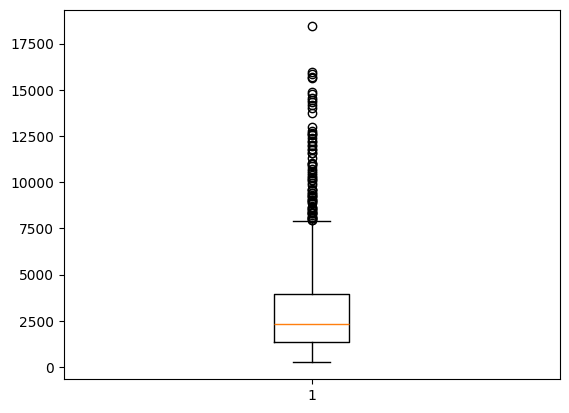

In [9]:
# Avaliando o boxblot do credito solicitado

fig = plt.boxplot(data_set_original["Credit amount"])
plt.show(fig)

In [10]:
# Avaliando as variaveis que sao textuais (nao numericas)

data_set_original["Sex"].value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

In [11]:
# Avaliando as variaveis que sao textuais (nao numericas)

data_set_original["Housing"].value_counts()

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [12]:
# Avaliando as variaveis que sao textuais (nao numericas)

data_set_original["Saving accounts"].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [13]:
# Avaliando as variaveis que sao textuais (nao numericas)

data_set_original["Checking account"].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [14]:
# Avaliando as variaveis que sao textuais (nao numericas)

data_set_original["Purpose"].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [15]:
# Avaliando as variaveis que sao textuais (nao numericas)

data_set_original["Risk"].value_counts()

# Precisara ser transformada em variavel binaria

Risk
good    700
bad     300
Name: count, dtype: int64

In [16]:
# Verifica registros duplicados

validacao_de_duplicados = data_set_original.duplicated().sum()

if validacao_de_duplicados == 0:
    print("ótimo, Nao existem registros duplicados")
else:
    print("Existem registros duplicados")

ótimo, Nao existem registros duplicados


In [17]:
# Verifica registros invalidos que possuem campos sem informacao 

data_set_original.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

- É possivel analisar que os Saving accounts e Checking account possuem valores null, estes campos podem ser nulos, porque necessariamente não precisa ter conta corrente ou conta poupance, ou seja náo é um requisito totalmente obrigatorio para a financeira que estamos estamos analisando, o banco alemão. 

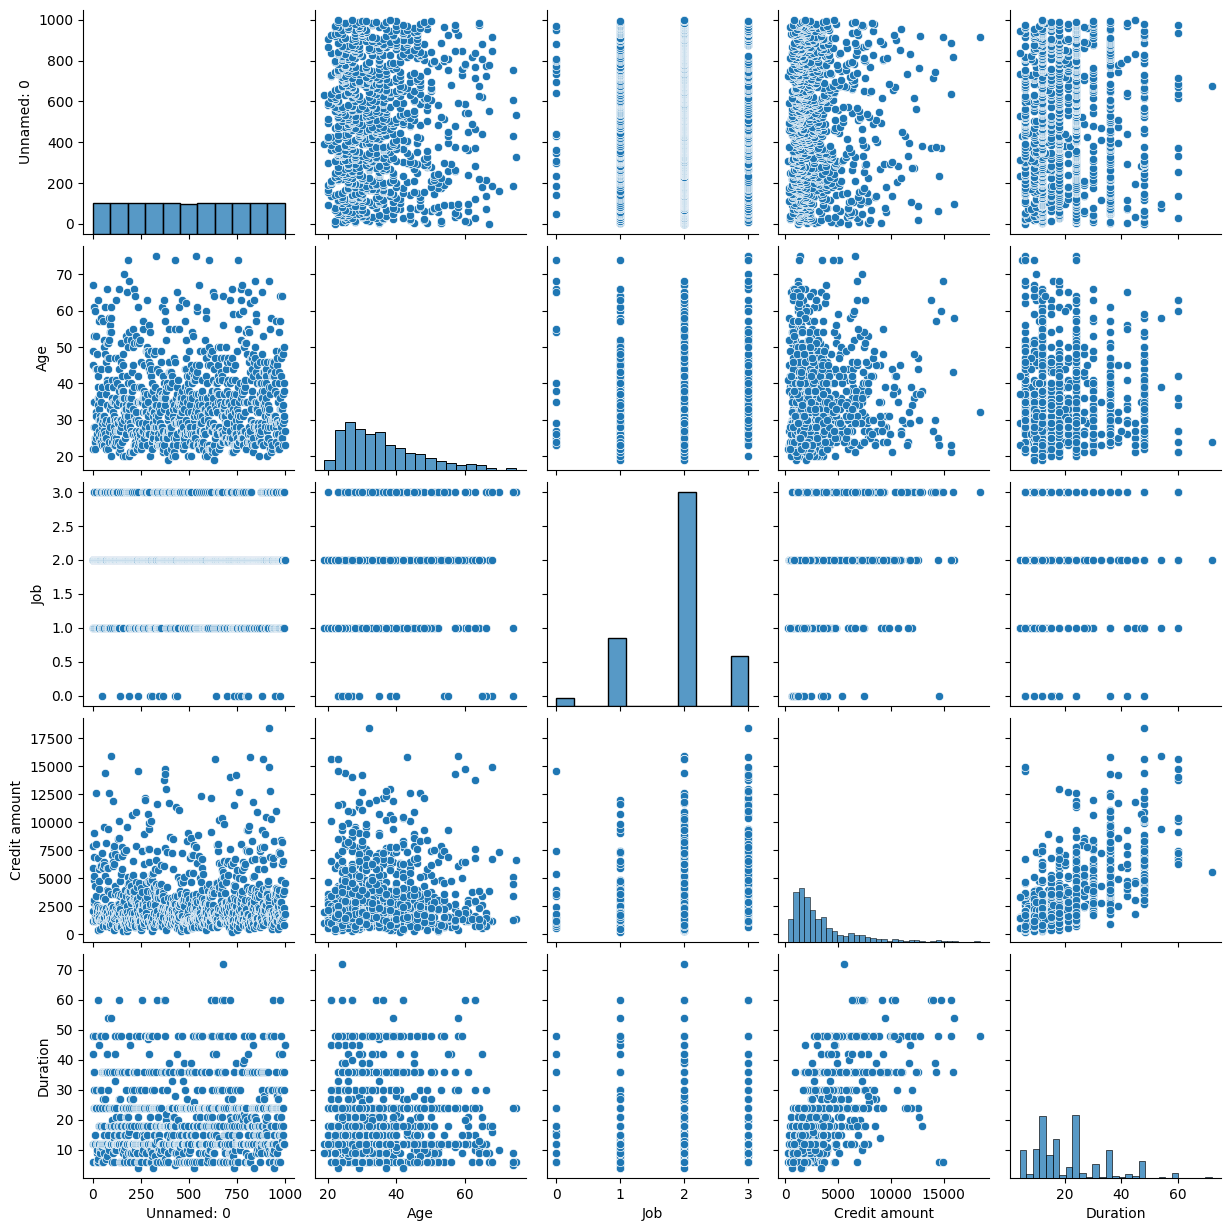

In [18]:
# Explorando a visualizacao dos meus dados 

fig = sns.pairplot(data_set_original)
plt.show(fig)

# 3 - Modelagem e normalização do dados

In [19]:
# Tranformando a variavel target, sera criado a coluna target

# Good = 1 = credito aprovado por ser bom pagador
# Bad = 0 = credito negagado por ser um mal pagador

data_set_original["Target"] = np.where(data_set_original["Risk"] == "good", 1, 0)
data_set_transformado = data_set_original
data_set_transformado



,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Target
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0
2,2,49,male,1,own,little,NaN,2096,12,education,good,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1
4,4,53,male,2,free,little,little,4870,24,car,bad,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,1
996,996,40,male,3,own,little,little,3857,30,car,good,1
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good,1
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad,0


In [20]:
#Removendo a coluna "Unnamed: 0" que nao é sao necessárias 

data_set_transformado = data_set_transformado.drop("Unnamed: 0", axis=1)
data_set_transformado

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Target
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0
2,49,male,1,own,little,NaN,2096,12,education,good,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1
4,53,male,2,free,little,little,4870,24,car,bad,0
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,1
996,40,male,3,own,little,little,3857,30,car,good,1
997,38,male,2,own,little,NaN,804,12,radio/TV,good,1
998,23,male,2,free,little,little,1845,45,radio/TV,bad,0


In [21]:
data_set_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  Target            1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [22]:
#Converter campos strings para numéricos para que o algoritmo possa calcular

for label in ["Sex", "Housing", "Saving accounts", "Checking account","Purpose","Risk"]:
    data_set_transformado[label] = LabelEncoder().fit_transform(data_set_transformado[label])

data_set_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
 9   Risk              1000 non-null   int64
 10  Target            1000 non-null   int64
dtypes: int64(11)
memory usage: 86.1 KB


In [23]:
# Separando as variaveis X (x = caracteristicas)

x = data_set_transformado[["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account",
                           "Credit amount", "Duration","Purpose", "Risk"]]

x.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


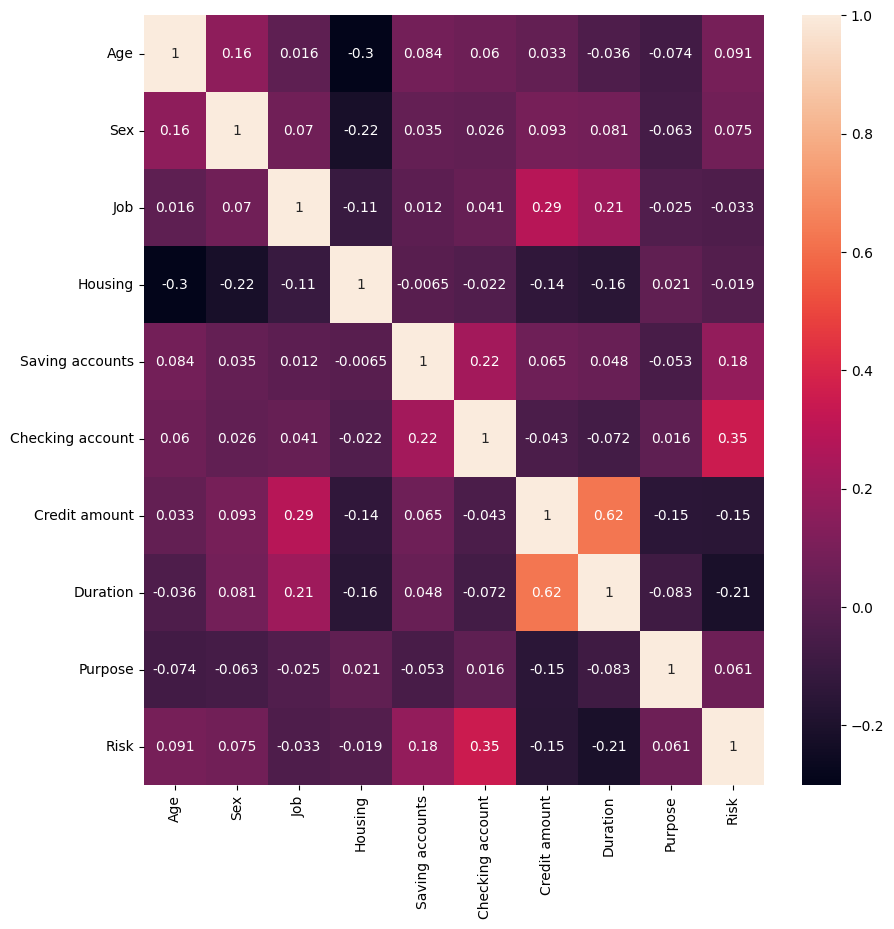

In [24]:
# Calculando as correlacoes

correlacoes = x.corr()

# plotando a correlacao

plt.figure(figsize=(10,10))
sns.heatmap(data=correlacoes, annot=True)
plt.show()

In [25]:
# Separando as variaveis Y (y = variavel target)

# y precisa ser um array

y = data_set_transformado["Target"].values.tolist()
type(y)

list

In [26]:
# Separando o dataset em treino e teste

# Vamos seperar em 30%, ou seja 70% sera uma usada para testar

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


# 4 - Realizando predição RANDOM FOREST E CLASSIFICAÇÃO

Dois modelos será usado para comparação

In [27]:
# Criando a máquina preditivas

predicao_RF = RandomForestClassifier(n_estimators=1000) #1000 arvores de decisao

predicao_XCB = XGBClassifier(n_estimators=2000, learning_rate=0.01) #2000 arvores de decisao

In [28]:
# Treinando os modelos com os dados

predicao_RF = predicao_RF.fit(x_train, y_train)
print(predicao_RF)

predicao_XCB.fit(x_train, y_train)
print(predicao_XCB)

RandomForestClassifier(n_estimators=1000)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


# 5 - Avaliando os modelos

In [29]:
# avaliando a acurácia da máquina preditiva

accuracy_score_RF = predicao_RF.score(x_test, y_test)
print("Acurácia de Random Forest: " + str(accuracy_score_RF))

accuracy_score_XCB = predicao_XCB.score(x_test, y_test)
print("Acurácia de XGBoost: " + str(accuracy_score_XCB))

Acurácia de Random Forest: 1.0
Acurácia de XGBoost: 1.0


In [30]:
# Avaliando a confusion Matrix e o classification Report

#RandomForest
pred_RF = predicao_RF.predict(x_test)
cm_RF = confusion_matrix(pred_RF, y_test)
print(cm_RF)
cr_RM = classification_report(pred_RF, y_test)
print(cr_RM)




[[ 91   0]
 [  0 209]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       209

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [31]:
# Avaliando a confusion Matrix e o classification Report

#XGBoost
pred_XCB = predicao_XCB.predict(x_test)
cm_XCB = confusion_matrix(pred_XCB, y_test)
print(cm_XCB)
cr_XCB = classification_report(pred_XCB, y_test)
print(cr_XCB)

[[ 91   0]
 [  0 209]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       209

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# 6 - Conclusão

Minha intenção com este estudo demonstra o potencial do uso de técnicas de aprendizado de máquina na avaliação de crédito, contribuindo para decisões mais informadas e seguras no setor financeiro.

O principal ponto deste estudo foi para que eu possa demonstrar o meu desenvolvimento com modelos preditivos

# Sobre os modelos:

Apesar da acurácia em ambos modelos ser perfeita, deduza que isso aconteceu porque a base de dados utilizada tem poucas
caracteristicas e muito pouca variação, tambem é possivel afirmar que os modelos foram treinados e testados com dados retirados
do kaggle, em uma situação empresarial o modelo poderá inserido em produção e possivelmente ser avaliado a sua performance.

# meu próximo desafio será utilizar uma base muito maior.